In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime
import re

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split

In [2]:
calendar_df = pd.read_csv('data/calendar.csv')
listings_df = pd.read_csv('data/listings.csv')
reviews_df = pd.read_csv('data/reviews.csv')

In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
listings_df.iloc[2, :]

id                                                               3308979
listing_url                         https://www.airbnb.com/rooms/3308979
scrape_id                                                 20160104002432
last_scraped                                                  2016-01-04
name                                 New Modern House-Amazing water view
                                                    ...                 
cancellation_policy                                               strict
require_guest_profile_picture                                          f
require_guest_phone_verification                                       f
calculated_host_listings_count                                         2
reviews_per_month                                                   1.15
Name: 2, Length: 92, dtype: object

## Work on features set by set

In [6]:
listings_original_df = listings_df
listings_clean_df = listings_original_df.copy()

In [7]:
listings_clean_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
url_columns = [
    'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 
    'host_picture_url', 'host_thumbnail_url'
]
listings_clean_df.drop(columns=url_columns, inplace=True)

In [9]:
unwanted_columns = ['host_id', 'scrape_id', 'last_scraped', 'host_name', 'experiences_offered', 'calendar_last_scraped', 'calendar_updated']
listings_clean_df.drop(columns=unwanted_columns, inplace=True)

In [10]:
listings_clean_df.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,t,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,t,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,t,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Que

### Fix data types

In [11]:
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
    'is_location_exact', 'has_availability', 'requires_license', 'instant_bookable', 'require_guest_profile_picture',
    'require_guest_phone_verification']

In [12]:
for column in boolean_columns:
   listings_clean_df[column]=  listings_clean_df[column].apply(lambda s: True if s == 't' else False)
listings_clean_df.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,False,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",True,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,True,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,NaN,WASHINGTON,False,moderate,False,False,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,True,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,True,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,False,NaN,WASHINGTON,False,strict,True,True,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,False,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",True,True,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,True,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,True,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,NaN,WASHINGTON,False,s

In [13]:
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
'extra_people', ]

In [14]:
for column in price_columns:
    listings_clean_df[column] = listings_clean_df[column].str.replace('[$,]', '', regex=True).astype(float)

In [15]:
listings_clean_df[price_columns].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,85.0,NaN,NaN,NaN,NaN,5.0
1,150.0,1000.0,3000.0,100.0,40.0,0.0
2,975.0,NaN,NaN,1000.0,300.0,25.0
3,100.0,650.0,2300.0,NaN,NaN,0.0
4,450.0,NaN,NaN,700.0,125.0,15.0


In [16]:
percentage_columns = ['host_response_rate', 'host_acceptance_rate']
for column in percentage_columns:
    listings_clean_df[column] = listings_clean_df[column].str.replace('%', '').astype(float) / 100

listings_clean_df[percentage_columns].head()

,host_response_rate,host_acceptance_rate
0,0.96,1.0
1,0.98,1.0
2,0.67,1.0
3,NaN,NaN
4,1.00,NaN


In [17]:
date_columns = ['host_since', 'first_review', 'last_review']


In [18]:
for column in date_columns:
    listings_clean_df[column] = pd.to_datetime(listings_clean_df[column])

## Text features

In [19]:
text_columns = ['name', 'space', 'description', 'neighborhood_overview', 'transit', 'host_about']
listings_clean_df[text_columns]

,name,space,description,neighborhood_overview,transit,host_about
0,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,"I am an artist, interior designer, and run a s..."
1,Bright & Airy Queen Anne Apartment,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",Living east coast/left coast/overseas. Time i...
2,New Modern House-Amazing water view,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,i love living in Seattle. i grew up in the mi...
3,Queen Anne Chateau,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,"Hi, I live in Seattle, Washington but I'm orig..."
...,...,...,...,...,...,...
3813,3BR Mountain View House in Seattle,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,We're located near lots of family fun. Woodlan...,NaN,NaN
3814,Portage Bay View!-One Bedroom Apt,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,The neighborhood is a quiet oasis that is clos...,Uber and Car2go are good options in Seattle. T...,I am a 58 year old male that is married to Mag...
3815,Private apartment view of Lake WA,NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,NaN,NaN
3816,Amazing View with Modern Comfort!,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,Madison Park offers a peaceful slow pace upsca...,Yes,NaN


In [20]:
listings_clean_df['all_text'] = ''
for column in text_columns:
    listings_clean_df['all_text'] += ' ' + listings_clean_df[column].fillna('')

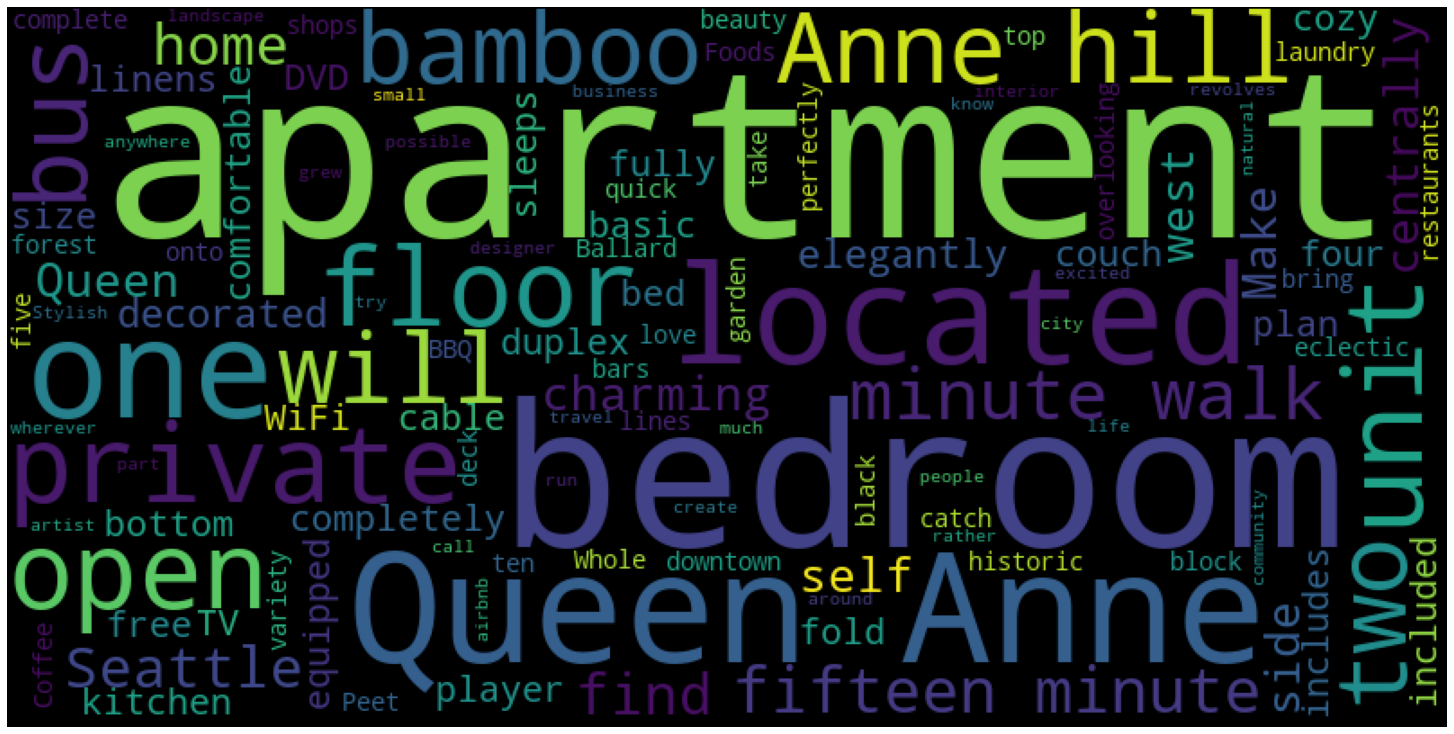

In [85]:
wc = WordCloud(width=800, height=400).generate(listings_clean_df['all_text'][0])
plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=200)
text_features = tfidf_vectorizer.fit_transform(listings_clean_df['all_text'], )

In [23]:
len(tfidf_vectorizer.get_feature_names())

200

In [24]:
text_features

<3818x200 sparse matrix of type '<class 'numpy.float64'>'
	with 277453 stored elements in Compressed Sparse Row format>

In [25]:
text_features_final = pd.DataFrame.sparse.from_spmatrix(text_features, columns=tfidf_vectorizer.get_feature_names())
text_features_final.columns = ['text_' + c for c in text_features_final.columns]
text_features_final.head()

,text_10,text_15,text_about,text_access,text_airport,text_all,text_also,text_am,text_an,text_and,text_any,text_apartment,text_are,text_area,text_around,text_as,text_at,text_available,text_away,text_back,text_ballard,text_bars,text_bath,text_bathroom,text_be,text_beautiful,text_bed,text_bedroom,text_bedrooms,text_best,text_block,text_blocks,text_building,text_bus,text_but,text_by,text_can,text_capitol,text_car,text_center,text_city,text_clean,text_close,text_coffee,text_comfortable,text_cozy,text_day,text_deck,text_dining,text_distance,text_district,text_do,text_down,text_downtown,text_dryer,text_easy,text_enjoy,text_everything,text_family,text_feel,text_few,text_floor,text_food,text_for,text_free,text_fremont,text_from,text_front,text_full,text_fully,text_garden,text_get,text_great,text_guest,text_guests,text_has,text_have,text_heart,text_here,text_hill,text_home,text_house,text_if,text_in,text_is,text_it,text_just,text_kitchen,text_lake,text_large,text_light,text_like,text_lines,text_live,text_living,text_ll,text_local,text_located,text_location,text_lots,text_love,text_main,text_make,text_many,text_market,text_me,text_miles,text_min,text_minute,text_minutes,text_modern,text_more,text_most,text_my,text_near,text_need,text_needle,text_neighborhood,text_new,text_no,text_not,text_of,text_off,text_on,text_one,text_only,text_open,text_or,text_other,text_our,text_out,text_over,text_own,text_park,text_parking,text_people,text_perfect,text_pike,text_place,text_please,text_private,text_public,text_queen,text_quiet,text_rail,text_re,text_restaurants,text_ride,text_right,text_room,text_seattle,text_shopping,text_shops,text_short,text_size,text_small,text_so,text_some,text_space,text_spacious,text_stay,text_street,text_studio,text_take,text_than,text_that,text_the,text_there,text_this,text_time,text_to,text_travel,text_tv,text_two,text_unit,text_university,text_up,text_us,text_use,text_very,text_view,text_views,text_walk,text_walking,text_want,text_washer,text_washington,text_we,text_well,text_west,text_when,text_which,text_while,text_who,text_will,text_with,text_within,text_work,text_you,text_your
0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.072559,0.083574,0.358989,0.0,0.313780,0.000000,0.000000,0.037354,0.054186,0.056508,0.000000,0.000000,0.0,0.091574,0.077981,0.000000,0.0,0.080027,0.000000,0.056300,0.164728,0.000000,0.000000,0.074678,0.000000,0.0,0.090921,0.000000,0.000000,0.054727,0.0,0.0,0.000000,0.029399,0.000000,0.0,0.066691,0.076748,0.082771,0.0,0.093252,0.0,0.000000,0.0,0.040639,0.000000,0.041139,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.074588,0.000000,0.020119,0.071534,0.0,0.041483,0.0,0.000000,0.090645,0.096709,0.0,0.000000,0.0,0.0,0.052244,0.000000,0.0,0.0,0.132027,0.079318,0.000000,0.000000,0.157978,0.073359,0.122152,0.058023,0.051216,0.0,0.000000,0.000000,0.000000,0.08547,0.000000,0.000000,0.000000,0.0,0.119219,0.000000,0.0,0.058910,0.000000,0.085182,0.0,0.000000,0.0,0.000000,0.000000,0.155238,0.06681,0.000000,0.000000,0.0,0.027207,0.0,0.0,0.000000,0.000000,0.000000,0.088002,0.0,0.196250,0.000000,0.086625,0.108242,0.0,0.092530,0.166442,0.0,0.000000,0.064103,0.00000,0.084014,0.0,0.000000,0.035363,0.000000,0.0,0.000000,0.0,0.128118,0.000000,0.217814,0.000000,0.000000,0.000000,0.050510,0.000000,0.000000,0.000000,0.056636,0.0,0.070993,0.000000,0.085264,0.043692,0.033488,0.0,0.000000,0.0,0.0,0.000000,0.0,0.072531,0.000000,0.000000,0.312089,0.054727,0.118754,0.000000,0.155555,0.038121,0.080988,0.129708,0.181871,0.0,0.103671,0.0,0.0,0.133289,0.000000,0.000000,0.104304,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.096767,0.0,0.000000,0.0,0.0,0.110621,0.074585,0.0,0.0,0.121617,0.053193
1,0.0,0.00000,0.095628,0.000000,0.00000,0.035118,0.039298,0.000000,0.074312,0.205202,0.0,0.139502,0.058083,0.000000,0.000000,0.000000,0.075368,0.000000,0.072751,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.200087,0.000000,0.000000,0.000000,0.152972,0.049801,0.000000,0.0,0.030317,0.000000,0.000000,0.036496,0.0,0.0

#### How are availabilities correlated?

In [26]:
availability_variables = ['has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365']
listings_clean_df[availability_variables].isnull().sum()

has_availability    0
availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

<AxesSubplot:>

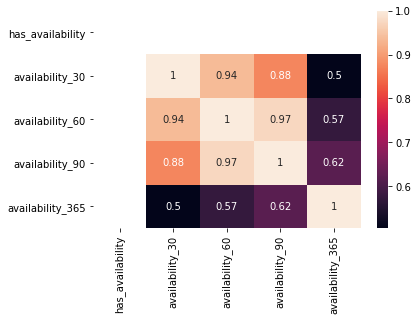

In [27]:
sns.heatmap(listings_clean_df[availability_variables].corr(), annot=True)

Only 365 availability is signifivcantly different from the other two.

## Location features set

In [28]:
location_variables = ['street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state',	
'zipcode', 'market', 'smart_location', 'country_code',	'country', 'latitude',	'longitude', 'is_location_exact']
listings_clean_df[location_variables].head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,True
1,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,True
2,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,True
3,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,True
4,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,True


In [29]:
for column in location_variables:
    value_counts = listings_clean_df[column].value_counts()
    print(column.upper())
    print(value_counts)
    print('\n')

STREET
1st Avenue, Seattle, WA 98101, United States                 30
Hubbell Place, Seattle, WA 98101, United States              29
12th Avenue East, Seattle, WA 98102, United States           29
East Denny Way, Seattle, WA 98122, United States             28
10th Avenue East, Seattle, WA 98102, United States           28
                                                             ..
Dakota & 38th ave sw, Seattle, WA 98126, United States        1
Mayfair Avenue North, Seattle, WA 98109, United States        1
Northwest Brygger Place, Seattle, WA 98107, United States     1
E Prospect St, Seattle, WA 98112, United States               1
Northeast 95 Street, Seattle, WA 98115, United States         1
Name: street, Length: 1442, dtype: int64


NEIGHBOURHOOD
Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
Fairmount Park          

<AxesSubplot:ylabel='Frequency'>

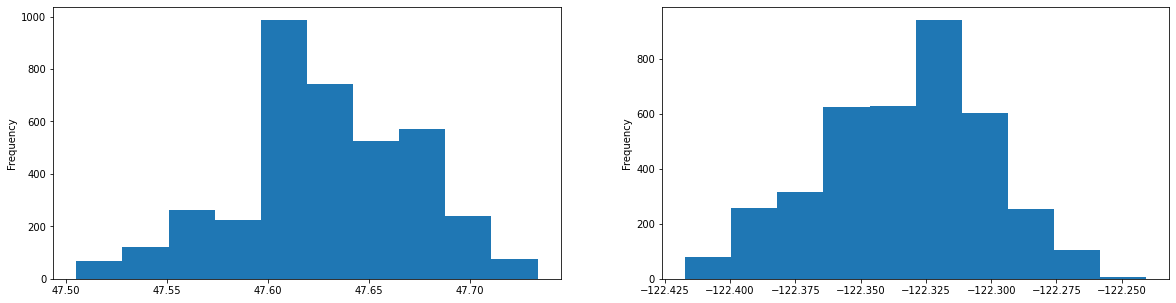

In [30]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
listings_clean_df['latitude'].plot.hist()
plt.subplot(1, 2, 2)
listings_clean_df['longitude'].plot.hist()

In [31]:
listings_clean_df['country'].value_counts()

United States    3818
Name: country, dtype: int64

In [32]:
listings_clean_df[location_variables].corr()

,latitude,longitude,is_location_exact
latitude,1.000000,-0.155092,0.033775
longitude,-0.155092,1.000000,0.022645
is_location_exact,0.033775,0.022645,1.000000


<AxesSubplot:>

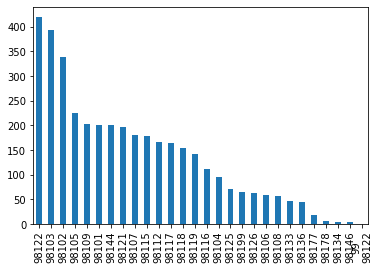

In [33]:
listings_clean_df['zipcode'].value_counts().plot.bar()

In [34]:
location_features_final = pd.get_dummies(listings_clean_df['zipcode'], prefix='zipcode')
location_features_final.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Property Details Features Set

In [35]:
property_details_variables = ['property_type', 'room_type','accommodates', 'bathrooms', 
'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']

In [36]:
listings_clean_df[property_details_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  3817 non-null   object 
 1   room_type      3818 non-null   object 
 2   accommodates   3818 non-null   int64  
 3   bathrooms      3802 non-null   float64
 4   bedrooms       3812 non-null   float64
 5   beds           3817 non-null   float64
 6   bed_type       3818 non-null   object 
 7   amenities      3818 non-null   object 
 8   square_feet    97 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 208.9+ KB


In [37]:
listings_clean_df[property_details_variables].head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN


In [38]:
property_details_categorical_variables = ['property_type', 'room_type', 'bed_type']

In [39]:
for column in property_details_categorical_variables:
    print(column.upper())
    print(listings_clean_df[column].value_counts())
    print('\n')

PROPERTY_TYPE
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64


ROOM_TYPE
Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64


BED_TYPE
Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64




In [40]:
property_details_categorical_dummies = pd.get_dummies(listings_clean_df[property_details_categorical_variables])
property_details_categorical_dummies.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [41]:
amenities_categorized = listings_clean_df['amenities'].str.replace('[{}"]', '', regex=True).str.get_dummies(',')
amenities_categorized.columns = ['amenities_' + re.sub(r'[\/\s]', '_', c.lower()) for c in amenities_categorized.columns]

In [42]:
amenities_categorized.head()

,amenities_24-hour_check-in,amenities_air_conditioning,amenities_breakfast,amenities_buzzer_wireless_intercom,amenities_cable_tv,amenities_carbon_monoxide_detector,amenities_cat(s),amenities_dog(s),amenities_doorman,amenities_dryer,amenities_elevator_in_building,amenities_essentials,amenities_family_kid_friendly,amenities_fire_extinguisher,amenities_first_aid_kit,amenities_free_parking_on_premises,amenities_gym,amenities_hair_dryer,amenities_hangers,amenities_heating,amenities_hot_tub,amenities_indoor_fireplace,amenities_internet,amenities_iron,amenities_kitchen,amenities_laptop_friendly_workspace,amenities_lock_on_bedroom_door,amenities_other_pet(s),amenities_pets_allowed,amenities_pets_live_on_this_property,amenities_pool,amenities_safety_card,amenities_shampoo,amenities_smoke_detector,amenities_smoking_allowed,amenities_suitable_for_events,amenities_tv,amenities_washer,amenities_washer___dryer,amenities_wheelchair_accessible,amenities_wireless_internet
0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


<AxesSubplot:>

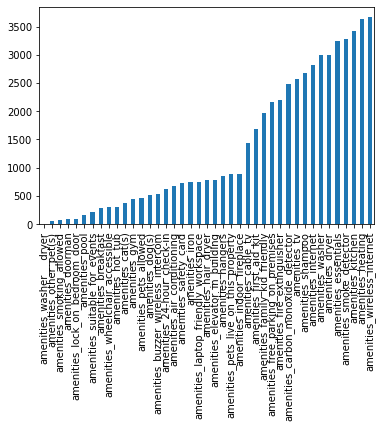

In [43]:
amenities_categorized.sum().sort_values().plot.bar()

In [44]:
property_details_numeric_variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
property_details_numeric_data = listings_clean_df[property_details_numeric_variables]
property_details_numeric_data.head()

,accommodates,bathrooms,bedrooms,beds
0,4,1.0,1.0,1.0
1,4,1.0,1.0,1.0
2,11,4.5,5.0,7.0
3,3,1.0,0.0,2.0
4,6,2.0,3.0,3.0


In [45]:
property_details_features_final = pd.concat([property_details_numeric_data, property_details_categorical_dummies, amenities_categorized], axis=1)
property_details_features_final.head()

,accommodates,bathrooms,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,amenities_24-hour_check-in,amenities_air_conditioning,amenities_breakfast,amenities_buzzer_wireless_intercom,amenities_cable_tv,amenities_carbon_monoxide_detector,amenities_cat(s),amenities_dog(s),amenities_doorman,amenities_dryer,amenities_elevator_in_building,amenities_essentials,amenities_family_kid_friendly,amenities_fire_extinguisher,amenities_first_aid_kit,amenities_free_parking_on_premises,amenities_gym,amenities_hair_dryer,amenities_hangers,amenities_heating,amenities_hot_tub,amenities_indoor_fireplace,amenities_internet,amenities_iron,amenities_kitchen,amenities_laptop_friendly_workspace,amenities_lock_on_bedroom_door,amenities_other_pet(s),amenities_pets_allowed,amenities_pets_live_on_this_property,amenities_pool,amenities_safety_card,amenities_shampoo,amenities_smoke_detector,amenities_smoking_allowed,amenities_suitable_for_events,amenities_tv,amenities_washer,amenities_washer___dryer,amenities_wheelchair_accessible,amenities_wireless_internet
0,4,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,4,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,11,4.5,5.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,3,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,6,2.0,3.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


## Host features set

In [46]:
listings_clean_df.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',


In [47]:
host_variables = ['host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']

In [48]:
listings_clean_df.groupby('host_response_time').mean()['host_response_rate']

host_response_time
a few days or more    0.347895
within a day          0.862479
within a few hours    0.958988
within an hour        0.987057
Name: host_response_rate, dtype: float64

host_respones_rate and host_response_time are correalated variables. The former is more granular. Using that only

In [49]:
listings_clean_df['host_neighbourhood'].value_counts()

Capitol Hill          405
Belltown              254
Ballard               210
Minor                 191
Queen Anne            189
                     ... 
Hell's Kitchen          1
Roxhill                 1
Kauaʻi                  1
Northwest District      1
Downtown Toronto        1
Name: host_neighbourhood, Length: 102, dtype: int64

In [50]:
listings_clean_df[host_variables].head()

,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,0.96,1.0,False,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",True,True
1,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,0.98,1.0,True,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True,True
2,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,0.67,1.0,False,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",True,True
3,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,False,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True
4,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,1.00,NaN,False,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True


In [51]:
host_verifications_dummies = listings_clean_df['host_verifications'].str.replace(r'[\'\[\]]', '', regex=True).str.get_dummies(',')
host_verifications_dummies.columns = ['host_verification_' + c for c in host_verifications_dummies.columns]
host_verifications_dummies.head()

,host_verification_ amex,host_verification_ facebook,host_verification_ google,host_verification_ jumio,host_verification_ kba,host_verification_ linkedin,host_verification_ manual_offline,host_verification_ manual_online,host_verification_ phone,host_verification_ photographer,host_verification_ reviews,host_verification_ sent_id,host_verification_ weibo,host_verification_None,host_verification_email,host_verification_google,host_verification_phone,host_verification_reviews
0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [52]:
host_columns_to_use = ['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified']
host_features_final = pd.concat([
    listings_clean_df[host_columns_to_use],
    host_verifications_dummies
], axis=1)
host_features_final['host_since'] = host_features_final['host_since'].dt.year
host_features_final.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,host_verification_ amex,host_verification_ facebook,host_verification_ google,host_verification_ jumio,host_verification_ kba,host_verification_ linkedin,host_verification_ manual_offline,host_verification_ manual_online,host_verification_ phone,host_verification_ photographer,host_verification_ reviews,host_verification_ sent_id,host_verification_ weibo,host_verification_None,host_verification_email,host_verification_google,host_verification_phone,host_verification_reviews
0,2011.0,0.96,1.0,False,3.0,3.0,True,True,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
1,2013.0,0.98,1.0,True,6.0,6.0,True,True,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0
2,2014.0,0.67,1.0,False,2.0,2.0,True,True,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,2013.0,NaN,NaN,False,1.0,1.0,True,True,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,2011.0,1.00,NaN,False,2.0,2.0,True,True,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


## Booking Features Set

In [53]:
booking_variables = [
    'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
    'minimum_nights', 'maximum_nights', 'requires_license', 'license', 
    'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
    'require_guest_phone_verification'
]
listings_clean_df[booking_variables].head()

,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,NaN,NaN,2,5.0,1,365,False,NaN,False,moderate,False,False
1,100.0,40.0,1,0.0,2,90,False,NaN,False,strict,True,True
2,1000.0,300.0,10,25.0,4,30,False,NaN,False,strict,False,False
3,NaN,NaN,1,0.0,1,1125,False,NaN,False,flexible,False,False
4,700.0,125.0,6,15.0,1,1125,False,NaN,False,strict,False,False


In [54]:
listings_clean_df['license'].value_counts()

Series([], Name: license, dtype: int64)

In [55]:
listings_clean_df['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [56]:
listings_clean_df[booking_variables].isna().mean()

security_deposit                    0.511262
cleaning_fee                        0.269775
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
requires_license                    0.000000
license                             1.000000
instant_bookable                    0.000000
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
dtype: float64

In [57]:
booking_variables_to_use = [
    'guests_included', 'extra_people', 
    'minimum_nights', 'maximum_nights', 'requires_license', 
    'instant_bookable', 'require_guest_profile_picture', 
    'require_guest_phone_verification'
]
booking_features_final = pd.concat([
    listings_clean_df[booking_variables_to_use],
    pd.get_dummies(listings_clean_df['cancellation_policy'], prefix='cancellation_policy')
], axis=1)
booking_features_final.head()

,guests_included,extra_people,minimum_nights,maximum_nights,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,2,5.0,1,365,False,False,False,False,0,1,0
1,1,0.0,2,90,False,False,True,True,0,0,1
2,10,25.0,4,30,False,False,False,False,0,0,1
3,1,0.0,1,1125,False,False,False,False,1,0,0
4,6,15.0,1,1125,False,False,False,False,0,0,1


## Review Features Set

In [58]:
review_variables = [
    'number_of_reviews', 'first_review', 'last_review',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]
listings_clean_df[review_variables].head()

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89


<AxesSubplot:>

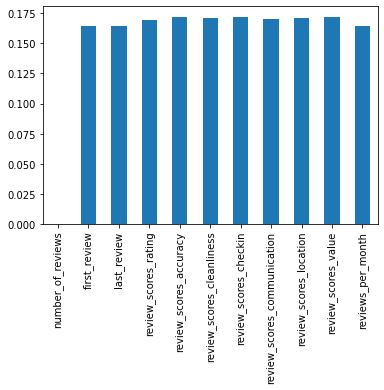

In [59]:
listings_clean_df[review_variables].isna().mean().plot.bar()

In [60]:
review_variables_to_use = [
    'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]
review_features_final = listings_clean_df[review_variables_to_use]

### Combining variable sets

In [61]:
X = pd.concat([text_features_final, host_features_final, location_features_final, property_details_features_final, booking_features_final, review_features_final], axis=1)

In [62]:
X.head()

,text_10,text_15,text_about,text_access,text_airport,text_all,text_also,text_am,text_an,text_and,text_any,text_apartment,text_are,text_area,text_around,text_as,text_at,text_available,text_away,text_back,text_ballard,text_bars,text_bath,text_bathroom,text_be,text_beautiful,text_bed,text_bedroom,text_bedrooms,text_best,text_block,text_blocks,text_building,text_bus,text_but,text_by,text_can,text_capitol,text_car,text_center,text_city,text_clean,text_close,text_coffee,text_comfortable,text_cozy,text_day,text_deck,text_dining,text_distance,text_district,text_do,text_down,text_downtown,text_dryer,text_easy,text_enjoy,text_everything,text_family,text_feel,text_few,text_floor,text_food,text_for,text_free,text_fremont,text_from,text_front,text_full,text_fully,text_garden,text_get,text_great,text_guest,text_guests,text_has,text_have,text_heart,text_here,text_hill,text_home,text_house,text_if,text_in,text_is,text_it,text_just,text_kitchen,text_lake,text_large,text_light,text_like,text_lines,text_live,text_living,text_ll,text_local,text_located,text_location,text_lots,text_love,text_main,text_make,text_many,text_market,text_me,text_miles,text_min,text_minute,text_minutes,text_modern,text_more,text_most,text_my,text_near,text_need,text_needle,text_neighborhood,text_new,text_no,text_not,text_of,text_off,text_on,text_one,text_only,text_open,text_or,text_other,text_our,text_out,text_over,text_own,text_park,text_parking,text_people,text_perfect,text_pike,text_place,text_please,text_private,text_public,text_queen,text_quiet,text_rail,text_re,text_restaurants,text_ride,text_right,text_room,text_seattle,text_shopping,text_shops,text_short,text_size,text_small,text_so,text_some,text_space,text_spacious,text_stay,text_street,text_studio,text_take,text_than,text_that,text_the,text_there,text_this,text_time,text_to,text_travel,text_tv,text_two,text_unit,text_university,text_up,text_us,text_use,text_very,text_view,text_views,text_walk,text_walking,text_want,text_washer,text_washington,text_we,text_well,text_west,text_when,text_which,text_while,text_who,text_will,text_with,text_within,text_work,text_you,text_your,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,host_verification_ amex,host_verification_ facebook,host_verification_ google,host_verification_ jumio,host_verification_ kba,host_verification_ linkedin,host_verification_ manual_offline,host_verification_ manual_online,host_verification_ phone,host_verification_ photographer,host_verification_ reviews,host_verification_ sent_id,host_verification_ weibo,host_verification_None,host_verification_email,host_verification_google,host_verification_phone,host_verification_reviews,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,accommodates,bathrooms,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,amenities_24-hour_check-in,amenities_air_conditioning,amenities_breakfast,amenities_buzzer_wireless_intercom,amenities_cable_tv,amenities_carbon_monoxide_detector,amenities_cat(s),amenities_dog(s),amenities_doorman,amenities_dryer,amenities_elevator_in_building,amenities_essentials,amenities_fa

In [63]:
X.shape

(3818, 343)

In [64]:
y = listings_clean_df['price']

In [65]:
y.shape

(3818,)

## Machine Learning

In [66]:
missing_x = X.isna().sum()
missing_x = missing_x[missing_x != 0] 
missing_x

host_since                       2
host_response_rate             523
host_acceptance_rate           773
host_listings_count              2
host_total_listings_count        2
bathrooms                       16
bedrooms                         6
beds                             1
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
dtype: int64

In [67]:
X.head()

,text_10,text_15,text_about,text_access,text_airport,text_all,text_also,text_am,text_an,text_and,text_any,text_apartment,text_are,text_area,text_around,text_as,text_at,text_available,text_away,text_back,text_ballard,text_bars,text_bath,text_bathroom,text_be,text_beautiful,text_bed,text_bedroom,text_bedrooms,text_best,text_block,text_blocks,text_building,text_bus,text_but,text_by,text_can,text_capitol,text_car,text_center,text_city,text_clean,text_close,text_coffee,text_comfortable,text_cozy,text_day,text_deck,text_dining,text_distance,text_district,text_do,text_down,text_downtown,text_dryer,text_easy,text_enjoy,text_everything,text_family,text_feel,text_few,text_floor,text_food,text_for,text_free,text_fremont,text_from,text_front,text_full,text_fully,text_garden,text_get,text_great,text_guest,text_guests,text_has,text_have,text_heart,text_here,text_hill,text_home,text_house,text_if,text_in,text_is,text_it,text_just,text_kitchen,text_lake,text_large,text_light,text_like,text_lines,text_live,text_living,text_ll,text_local,text_located,text_location,text_lots,text_love,text_main,text_make,text_many,text_market,text_me,text_miles,text_min,text_minute,text_minutes,text_modern,text_more,text_most,text_my,text_near,text_need,text_needle,text_neighborhood,text_new,text_no,text_not,text_of,text_off,text_on,text_one,text_only,text_open,text_or,text_other,text_our,text_out,text_over,text_own,text_park,text_parking,text_people,text_perfect,text_pike,text_place,text_please,text_private,text_public,text_queen,text_quiet,text_rail,text_re,text_restaurants,text_ride,text_right,text_room,text_seattle,text_shopping,text_shops,text_short,text_size,text_small,text_so,text_some,text_space,text_spacious,text_stay,text_street,text_studio,text_take,text_than,text_that,text_the,text_there,text_this,text_time,text_to,text_travel,text_tv,text_two,text_unit,text_university,text_up,text_us,text_use,text_very,text_view,text_views,text_walk,text_walking,text_want,text_washer,text_washington,text_we,text_well,text_west,text_when,text_which,text_while,text_who,text_will,text_with,text_within,text_work,text_you,text_your,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,host_verification_ amex,host_verification_ facebook,host_verification_ google,host_verification_ jumio,host_verification_ kba,host_verification_ linkedin,host_verification_ manual_offline,host_verification_ manual_online,host_verification_ phone,host_verification_ photographer,host_verification_ reviews,host_verification_ sent_id,host_verification_ weibo,host_verification_None,host_verification_email,host_verification_google,host_verification_phone,host_verification_reviews,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,accommodates,bathrooms,bedrooms,beds,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,amenities_24-hour_check-in,amenities_air_conditioning,amenities_breakfast,amenities_buzzer_wireless_intercom,amenities_cable_tv,amenities_carbon_monoxide_detector,amenities_cat(s),amenities_dog(s),amenities_doorman,amenities_dryer,amenities_elevator_in_building,amenities_essentials,amenities_fa

In [68]:
for column in missing_x.index:
    X[column] = X[column].fillna(X[column].median())

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
X.dtypes.value_counts()

Sparse[float64, 0]    200
int64                  64
uint8                  55
float64                17
bool                    7
dtype: int64

# Fitting Linear Regression

In [71]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [72]:
linear_regression.score(X_train, y_train)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.6523811002067894

In [73]:
linear_regression.score(X_test, y_test)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.5788653911667578

In [74]:
ridge_regression = Ridge(alpha=0.001)

ridge_regression.fit(X_train, y_train)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Ridge(alpha=0.001)

In [75]:
ridge_regression.score(X_train, y_train)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.6523810037809615

In [76]:
ridge_regression.score(X_test, y_test)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.5789081551788142

In [77]:
ridge_cv = RidgeCV(alphas=[10 ** i for i in range(-5, 5)], normalize=True)
ridge_cv.fit(X_train, y_train)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04]),
        normalize=True)

In [78]:
ridge_cv.score(X_test, y_test)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.593493981570257

In [79]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LassoCV()

In [80]:
lasso_cv.score(X_test, y_test)

c:\users\sivakar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.5646603153472388

## build coefficients dataframe

In [81]:
coefs_df = pd.DataFrame({
  'columns': X.columns,
  'ridge': ridge_cv.coef_,
  'lasso': lasso_cv.coef_,
  'linreg': linear_regression.coef_
})

In [82]:
coefs_df.describe()

,ridge,lasso,linreg
count,343.000000,343.000000,3.430000e+02
mean,-2.636242,0.305120,-6.551260e+07
std,25.541612,2.689233,9.880323e+09
min,-90.192758,-3.945547,-1.265813e+11
25%,-14.256804,0.000000,-1.486664e+01
50%,-0.393174,0.000000,7.611614e-02
75%,7.576594,-0.000000,1.684627e+01
max,184.968770,30.320004,1.265813e+11


In [83]:

coefs_df.sort_values(['ridge'], ascending=False)

,columns,ridge,lasso,linreg
260,property_type_Boat,184.968770,0.0,214.182001
91,text_like,99.559775,0.0,111.654050
24,text_be,85.834408,0.0,101.927318
246,zipcode_98134,70.642130,0.0,107.309709
164,text_than,69.366507,0.0,79.441549
...,...,...,...,...
160,text_stay,-66.844875,-0.0,-76.560183
10,text_any,-68.055167,-0.0,-88.283623
102,text_make,-72.977728,-0.0,-78.357776
58,text_family,-83.050604,-0.0,-98.753931


In [86]:
coefs_df.sort_values('lasso', ascending=False)

,columns,ridge,lasso,linreg
274,room_type_Entire home/apt,17.466622,30.320004,1.064147e+10
255,bathrooms,25.291570,25.871462,2.576085e+01
256,bedrooms,22.399353,22.658592,2.789277e+01
292,amenities_elevator_in_building,9.515836,14.415906,1.263333e+01
254,accommodates,7.288768,12.593091,8.730622e+00
...,...,...,...,...
326,maximum_nights,-0.000507,-0.000427,-6.207358e-04
334,number_of_reviews,-0.010916,-0.022661,2.078150e-03
341,review_scores_value,-7.644836,-1.952725,-9.980272e+00
297,amenities_free_parking_on_premises,0.719806,-1.954969,1.574163e+00


In [87]:
coefs_df.sort_values('linreg', ascending=False)

,columns,ridge,lasso,linreg
204,host_listings_count,0.040658,5.444208e-02,1.265813e+11
274,room_type_Entire home/apt,17.466622,3.032000e+01,1.064147e+10
275,room_type_Private room,-12.965396,-0.000000e+00,1.064147e+10
276,room_type_Shared room,-39.096789,-0.000000e+00,1.064147e+10
277,bed_type_Airbed,6.573816,-0.000000e+00,8.836167e+07
...,...,...,...,...
58,text_family,-83.050604,-0.000000e+00,-9.875393e+01
331,cancellation_policy_flexible,0.796812,0.000000e+00,-1.827902e+10
333,cancellation_policy_strict,0.702314,0.000000e+00,-1.827902e+10
332,cancellation_policy_moderate,-1.504220,-0.000000e+00,-1.827902e+10


# Question 1: How are amenities affecting price?

In [99]:
linreg_amenities = LinearRegression()
linreg_amenities.fit(amenities_categorized, listings_clean_df['price'])

LinearRegression()

In [116]:
amenities_coefs = pd.DataFrame({
    'amenity': [c[10:] for c in amenities_categorized.columns],
    'coef': linreg_amenities.coef_
})
amenities_coefs.sort_values('coef', ascending=False)

,amenity,coef
8,doorman,52.136285
12,family_kid_friendly,33.366138
4,cable_tv,23.206702
21,indoor_fireplace,21.563427
35,suitable_for_events,18.531453
20,hot_tub,18.461492
36,tv,17.879405
24,kitchen,15.346380
27,other_pet(s),13.738752
1,air_conditioning,13.626979


##  Question: How does neighborhood affect prices?

<AxesSubplot:xlabel='neighbourhood_cleansed'>

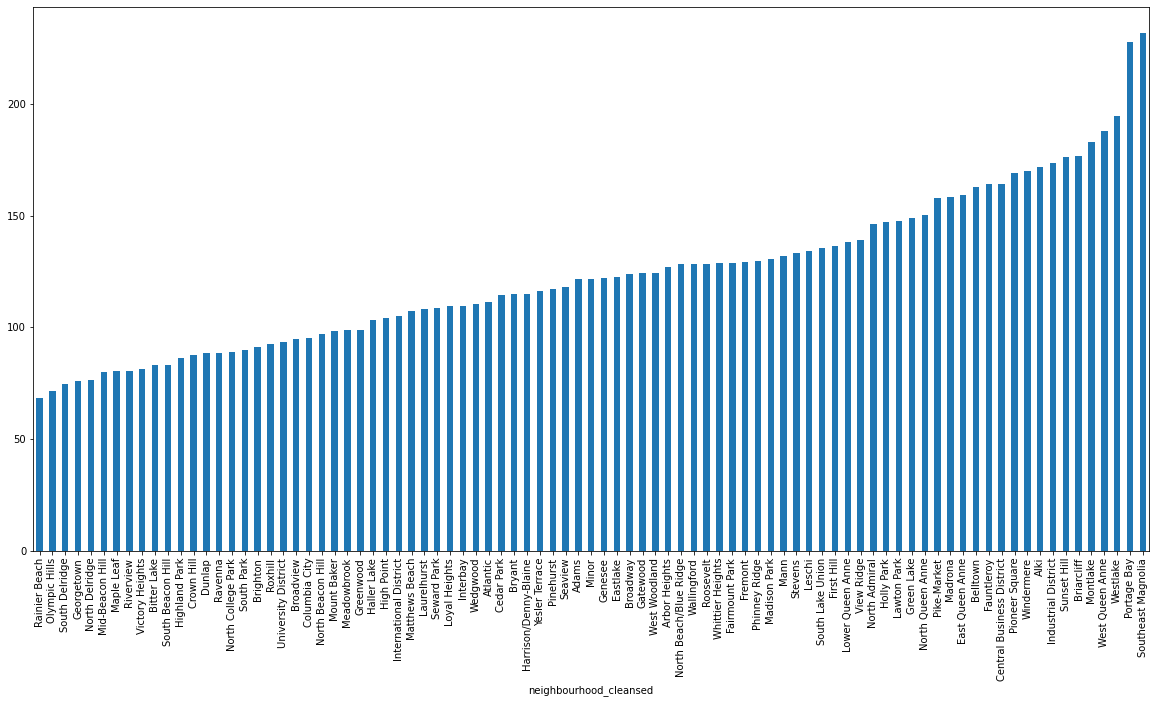

In [121]:
prices_by_neighborhood = listings_clean_df.groupby('neighbourhood_cleansed').mean()['price'].sort_values()
plt.figure(figsize=(20, 10))
prices_by_neighborhood.plot.bar()

In [ ]:
listings_clean_df['neighbourhood_group_cleansed']

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

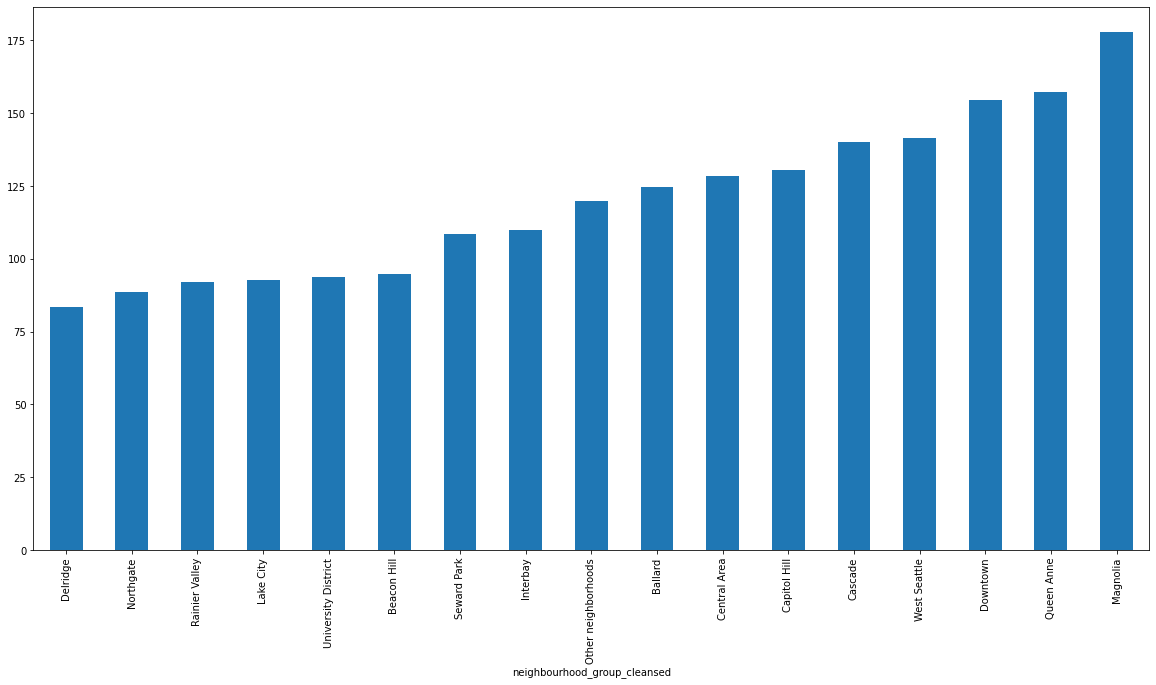

In [124]:
prices_by_neighborhood_group = listings_clean_df.groupby('neighbourhood_group_cleansed').mean()['price'].sort_values()
plt.figure(figsize=(20, 10))
prices_by_neighborhood_group.plot.bar()

<AxesSubplot:xlabel='zipcode'>

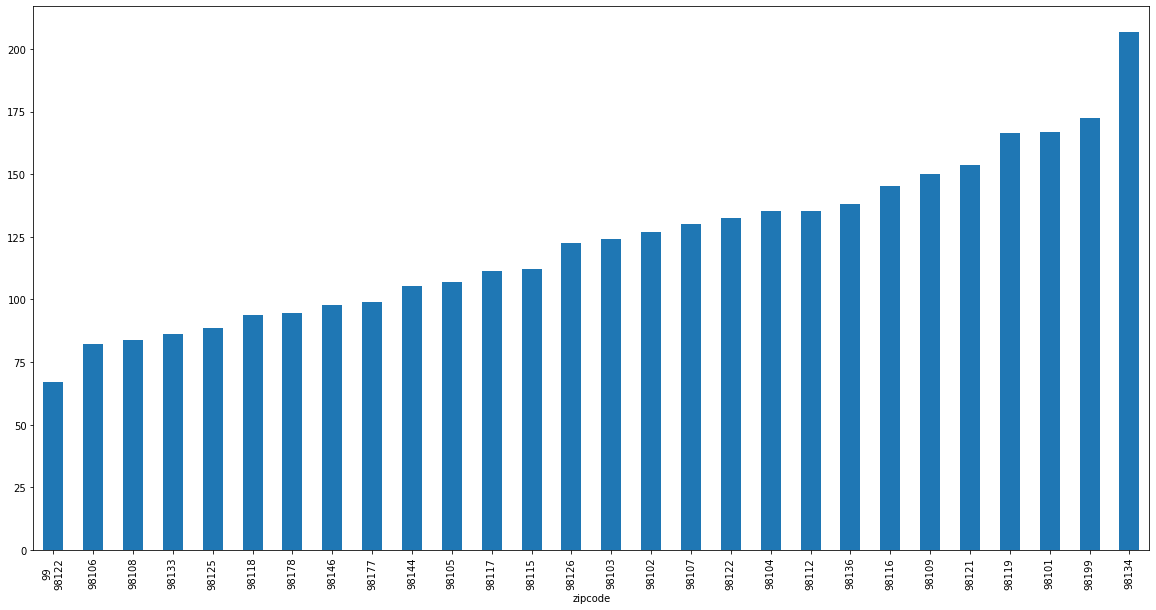

In [126]:
prices_by_zip_code = listings_clean_df.groupby('zipcode').mean()['price'].sort_values()
plt.figure(figsize=(20, 10))
prices_by_zip_code.plot.bar()

## Question 3: Which neighborhood is popular among revivews? 

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

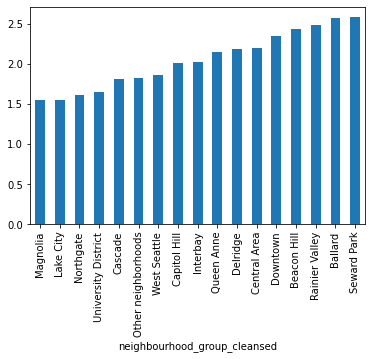

In [128]:
reviews_by_neighborhood_group = listings_clean_df.groupby('neighbourhood_group_cleansed').mean()['reviews_per_month'].sort_values()
reviews_by_neighborhood_group.plot.bar()

## Question 4: What are the popular amenities?

<AxesSubplot:>

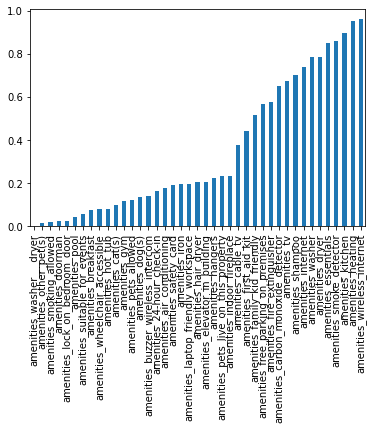

In [134]:
amenities_categorized.mean().sort_values().plot.bar()

### What are the popular host verifications?

<AxesSubplot:>

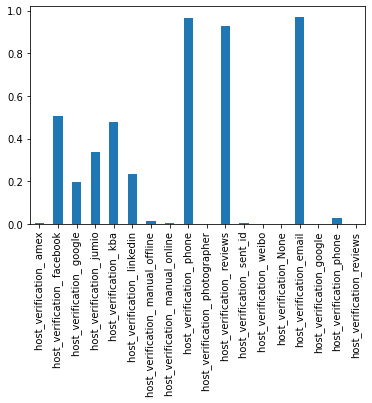

In [136]:
host_verifications_dummies.mean().plot.bar()